# DATA ANALYSIS IN BUSINESS - HW 2
## Ömer Seyfeddin Koç - 070160029

# Question 1

## Data Exploration

In [23]:
#Importing modules.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier

np.random.seed(0)

In [2]:
#Importing data set
#Drop NA value
#First look to all data in CarSeats_Dataset with .head()
df=pd.read_csv(r"CarSeats_Dataset.csv")
df=df.dropna()
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
#Check the shape of CarSeats_Dataset
df.shape

(400, 11)

In [6]:
#Checked for any null values.
#There is no NULL values in my dataset.
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [13]:
# Checked categories for ShelveLoc.
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [7]:
#Converted categorical variables into dummy variables.
#These are: ShelveLoc, Urban and US.
dummies = pd.get_dummies(df[['ShelveLoc','Urban', 'US']])
dummies

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...
395,0,1,0,0,1,0,1
396,0,0,1,1,0,0,1
397,0,0,1,0,1,0,1
398,1,0,0,0,1,0,1


In [9]:
# dropped the "Sales" variable 
# dropped the transformed categorical variables above.
X_ = df.drop(['Sales','ShelveLoc', 'Urban', 'US'], axis = 1)

In [31]:
# combined X_ with my new dummies variables and checked X
# ShelveLoc_Bad/_Good, Urban_Yes, US_Yes selected as the new column.
X = pd.concat([X_, dummies[['ShelveLoc_Bad','ShelveLoc_Good',
                            'Urban_Yes', 'US_Yes']]], axis = 1)
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,Urban_Yes,US_Yes
0,138,73,11,276,120,42,17,1,0,1,1
1,111,48,16,260,83,65,10,0,1,1,1
2,113,35,10,269,80,59,12,0,0,1,1
3,117,100,4,466,97,55,14,0,0,1,1
4,141,64,3,340,128,38,13,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,1,1
396,139,23,3,37,120,55,11,0,0,0,1
397,162,26,12,368,159,40,18,0,0,1,1
398,100,79,7,284,95,50,12,1,0,1,1


In [32]:
# More information about X.
# Non-null check, Dtype.
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CompPrice       400 non-null    int64
 1   Income          400 non-null    int64
 2   Advertising     400 non-null    int64
 3   Population      400 non-null    int64
 4   Price           400 non-null    int64
 5   Age             400 non-null    int64
 6   Education       400 non-null    int64
 7   ShelveLoc_Bad   400 non-null    uint8
 8   ShelveLoc_Good  400 non-null    uint8
 9   Urban_Yes       400 non-null    uint8
 10  US_Yes          400 non-null    uint8
dtypes: int64(7), uint8(4)
memory usage: 26.6 KB


In [33]:
# "y" = "sales"
# check y value's
y = df.Sales
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

## a) Split the data set into a training set and a test set.

In [34]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .20, 
                                                    random_state = 1)

In [36]:
# General look to X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 93 to 37
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CompPrice       320 non-null    int64
 1   Income          320 non-null    int64
 2   Advertising     320 non-null    int64
 3   Population      320 non-null    int64
 4   Price           320 non-null    int64
 5   Age             320 non-null    int64
 6   Education       320 non-null    int64
 7   ShelveLoc_Bad   320 non-null    uint8
 8   ShelveLoc_Good  320 non-null    uint8
 9   Urban_Yes       320 non-null    uint8
 10  US_Yes          320 non-null    uint8
dtypes: int64(7), uint8(4)
memory usage: 21.2 KB


In [37]:
# lets check the x_train
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,Urban_Yes,US_Yes
93,145,30,0,67,104,55,17,0,0,1,0
23,121,31,0,292,109,79,10,0,0,1,0
299,135,40,17,497,96,54,17,0,0,0,1
13,115,28,11,29,86,53,18,0,1,1,1
90,115,22,0,491,103,64,11,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
255,123,81,8,198,81,80,15,1,0,1,1
72,115,45,0,432,116,25,15,0,0,1,0
396,139,23,3,37,120,55,11,0,0,0,1
235,126,32,8,95,132,50,17,0,0,1,1


## b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [38]:
# Create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
# fit train data.
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

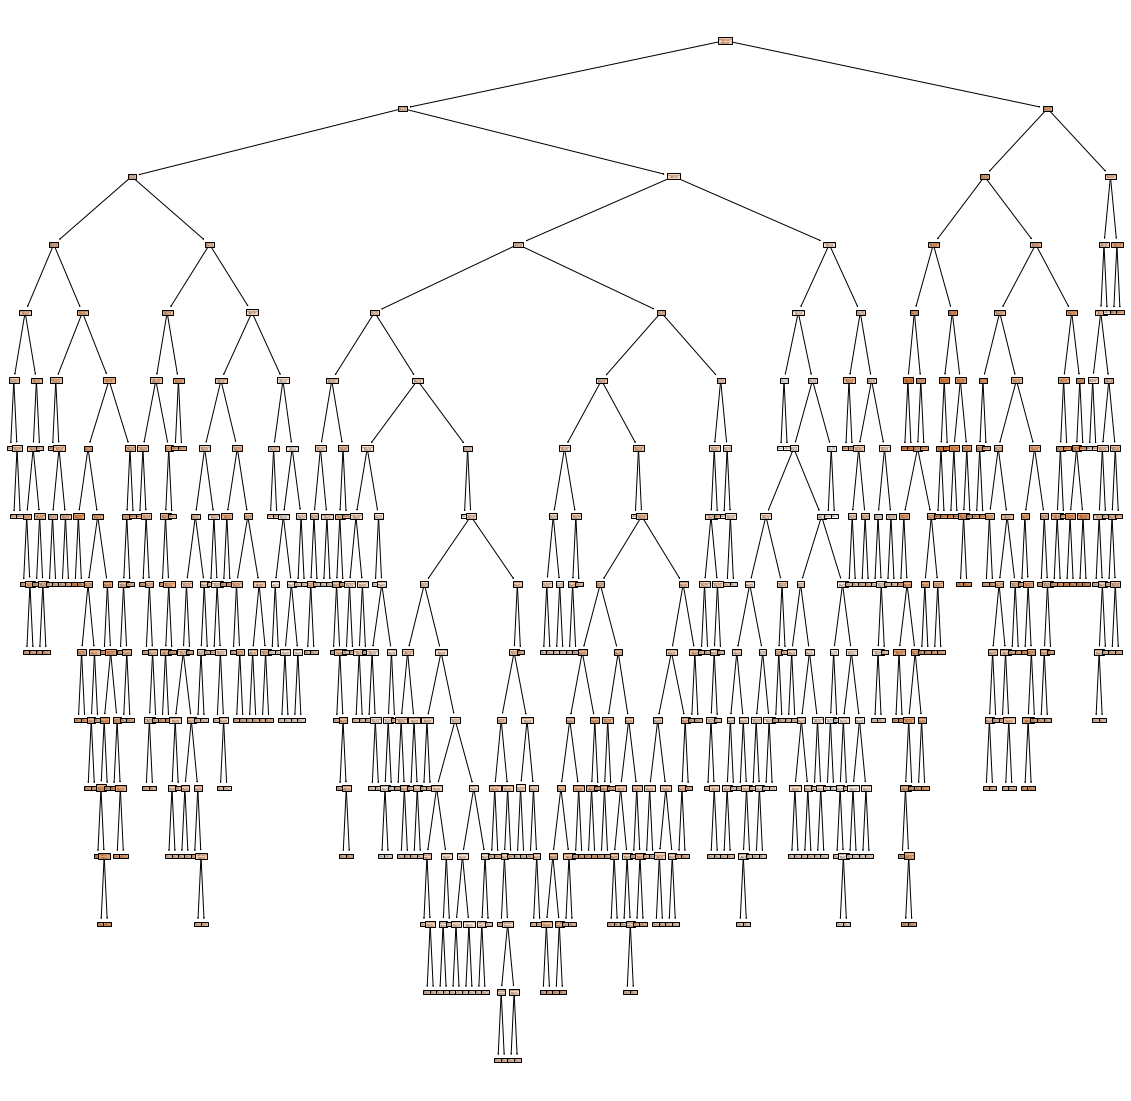

In [39]:
#Plotted decision tree without and penalty restriction

fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(regressor, feature_names=['CompPrice','Income','Advertising','Population',
                                             'Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good',
                                             'Urban_Yes','US_Yes'], filled=True)

In [40]:
#Predicting response values of my test data by using previous decision tree as my predictor
y_pred = regressor.predict(X_test)
y_pred

array([ 7.8 ,  7.8 ,  5.05,  9.71,  9.71,  8.01,  6.43,  9.32,  6.03,
        3.91,  5.56,  9.95,  7.56,  4.96,  8.78,  6.23,  5.01, 11.48,
        4.78,  5.47,  5.21,  6.43,  6.97,  5.27, 10.49,  5.68, 10.1 ,
        5.01,  9.95,  3.91,  6.67,  7.91,  4.56,  5.47,  5.21, 11.48,
        6.03,  6.98,  5.61, 12.11, 10.21,  7.3 ,  8.14,  3.72,  6.93,
        6.43,  8.65,  9.5 ,  8.87,  3.58,  6.42,  7.78,  7.63, 14.37,
       10.98,  9.39, 15.63,  6.81,  9.33, 11.7 ,  5.01,  5.53, 11.7 ,
        6.03,  6.2 ,  8.71,  5.71,  8.75, 10.  ,  3.9 ,  9.  ,  6.62,
        6.23,  8.67, 12.61,  9.09,  6.1 ,  3.13,  9.16,  5.56])

In [41]:
#Comparing my predicted y values with their actual value

comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp

,Actual,Predicted
398,5.94,7.80
125,9.34,7.80
328,3.15,5.05
339,11.54,9.71
172,9.03,9.71
...,...,...
347,6.88,9.09
41,7.96,6.10
180,4.94,3.13
132,9.54,9.16


In [42]:
# There is test MSE of y values predicted by decision tree without penalty
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 5.948299999999999


## c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

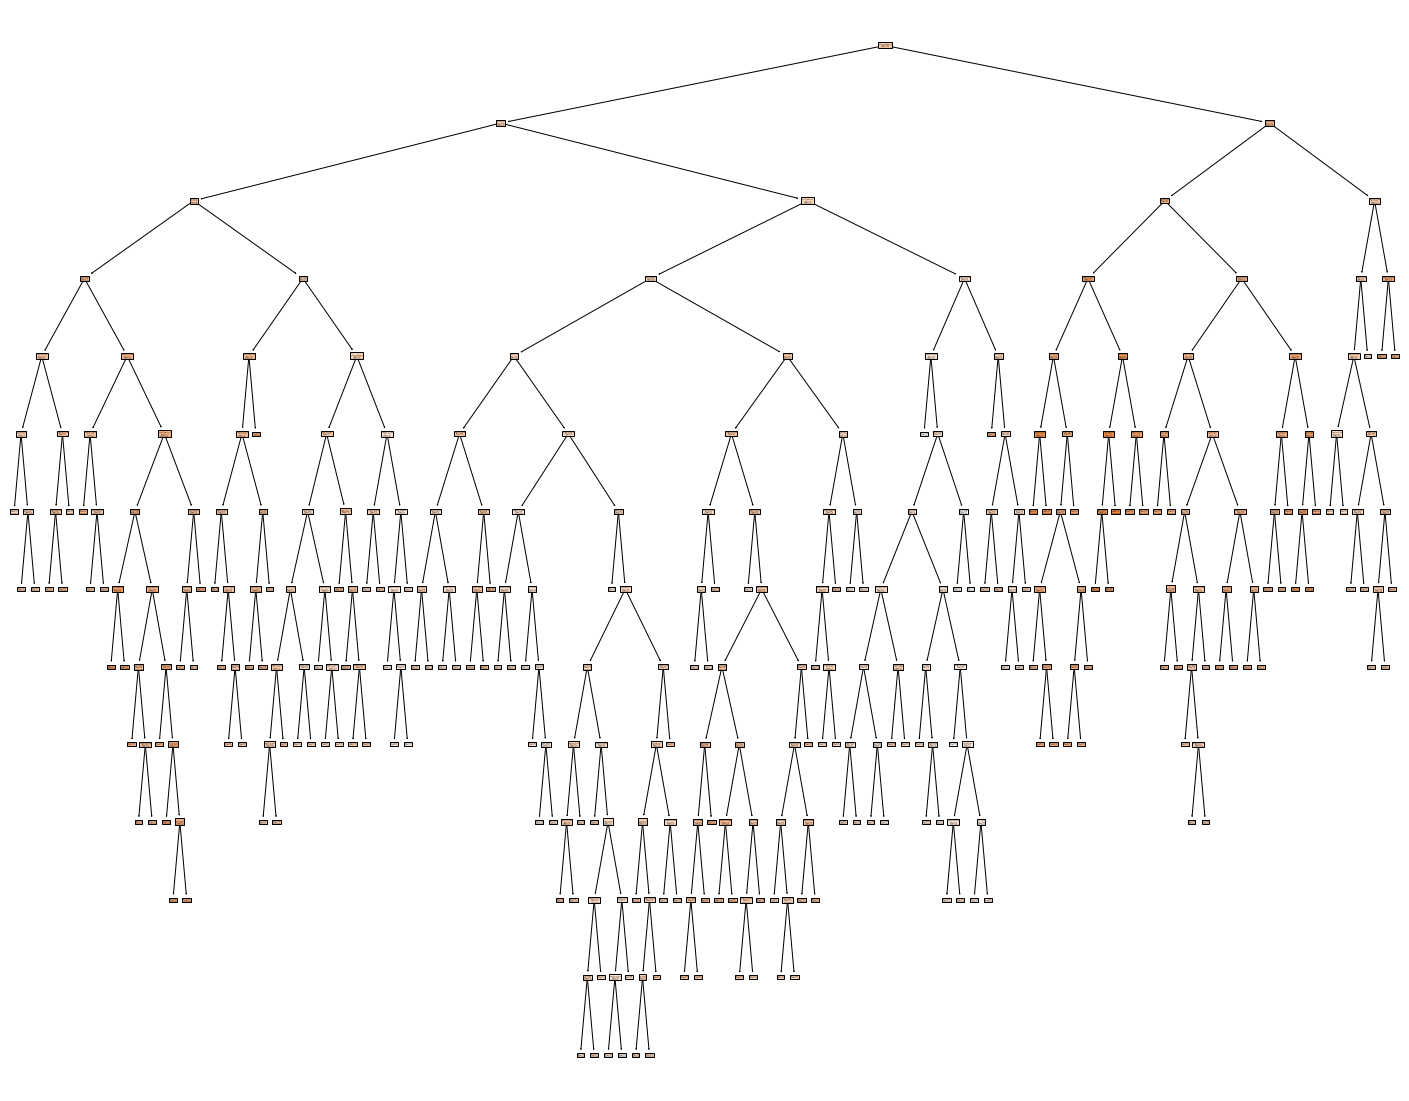

In [56]:
# Added a penalty point resulting from the number of terminal nodes
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.001)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=['CompPrice','Income','Advertising','Population',
                                             'Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good',
                                             'Urban_Yes','US_Yes'], filled=True)
y_pred = regressor.predict(X_test)

In [57]:
# Checked new MSE score with penalty (alpha=0.001)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 5.744900941319442


In [58]:
# Instead of manually testing alpha values, we define a specific alpha range / values. 
# Errors will be calculated using the cross validation method using these alphas (Below).
path = regressor.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.56250000e-07, 1.56250000e-07, 1.56250000e-07,
        1.56250000e-07, 1.56250000e-07, 1.56250000e-07, 1.56250000e-07,
        1.56250000e-07, 1.56250000e-07, 1.56250000e-07, 1.56250000e-07,
        2.08333333e-07, 6.25000000e-07, 6.25000000e-07, 6.25000000e-07,
        6.25000000e-07, 1.40625000e-06, 1.40625000e-06, 1.40625000e-06,
        1.40625000e-06, 1.40625000e-06, 1.40625000e-06, 2.50000000e-06,
        2.50000000e-06, 2.50000000e-06, 2.50000000e-06, 3.90625000e-06,
        3.90625000e-06, 3.90625000e-06, 5.62500000e-06, 5.62500000e-06,
        5.62500000e-06, 8.80208333e-06, 8.80208333e-06, 1.00000000e-05,
        1.26562500e-05, 1.26562500e-05, 1.26562500e-05, 1.26562500e-05,
        1.26562500e-05, 1.50520833e-05, 1.50520833e-05, 1.56250000e-05,
        1.56250000e-05, 1.56250000e-05, 1.89062500e-05, 1.89062500e-05,
        2.25000000e-05, 2.29687500e-05, 2.64062500e-05, 3.04166667e-05,
        3.06250000e-05, 3.06250000e-05, 4.00000000

In [59]:
# Cross validation method is applied to find the best alpha. 
# For each alpha value, 10 different cross validation will be calculated in the training set.
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=i)
        regressor.fit(X_trainp, y_trainp) 
        y_pred=regressor.predict(X_valid)
        CVErrors.append([i,mean_squared_error(y_trainp, regressor.predict(X_trainp)),
                         mean_squared_error(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Error','Validation Error'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

,alpha,Training Error,Validation Error
0,0.000000e+00,0.000000,4.814293
1,1.562500e-07,0.000000,4.814293
2,1.562500e-07,0.000000,4.814293
3,1.562500e-07,0.000000,4.814293
4,1.562500e-07,0.000000,4.814293
...,...,...,...
290,3.742630e-01,4.053900,5.034475
291,3.783758e-01,4.091528,5.246729
292,4.702762e-01,4.547232,5.450133
293,8.316325e-01,5.250392,5.776193


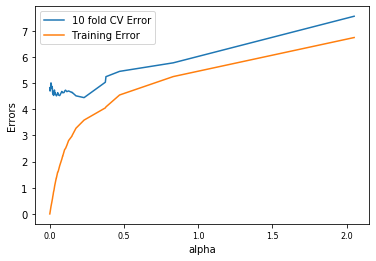

In [60]:
# It will draw the errors, to see the differences between training and validation error. 
# Alpha values are on the x-axis.
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_alpha['alpha'].values,kfoldCV_by_alpha['Validation Error'].values,label = '10 fold CV Error')
ax.plot(kfoldCV_by_alpha['alpha'].values,kfoldCV_by_alpha['Training Error'].values,label = 'Training Error')
ax.set_xlabel('alpha')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [61]:
#Sort values by validation errors to see best Alpha.
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Error'],ascending=True)
kfoldCV_by_alpha

,alpha,Training Error,Validation Error
289,0.230906,3.586789,4.446300
288,0.176400,3.276002,4.514206
270,0.044975,1.387399,4.514529
276,0.066890,1.846815,4.524311
269,0.043255,1.356744,4.526090
...,...,...,...
290,0.374263,4.053900,5.034475
291,0.378376,4.091528,5.246729
292,0.470276,4.547232,5.450133
293,0.831633,5.250392,5.776193


Mean Squared Error: 5.768403900721365


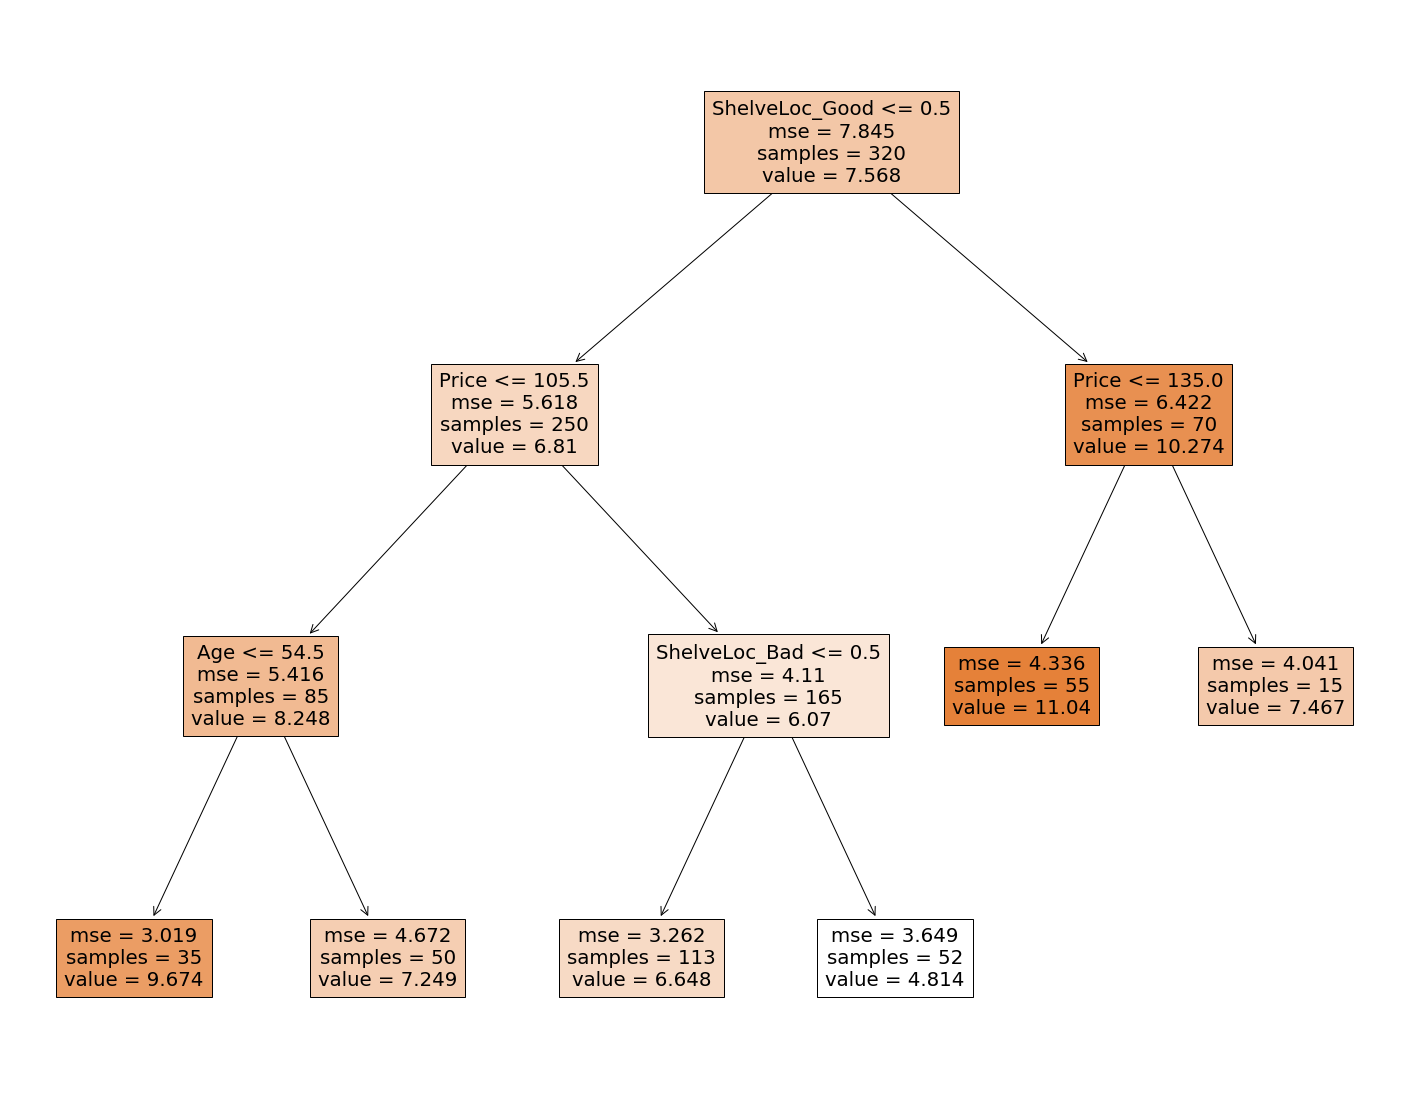

In [62]:
# Now we are gonna use alpha value with the least validation error to construct our decision tree.
# Alpha value should be 0.230906.
# Compute MSE
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.230906)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=['CompPrice','Income','Advertising','Population',
                                             'Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good',
                                             'Urban_Yes','US_Yes'], filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

### As a result of all these steps, Pruning has increased our test MSE value. Our previous MSE value was 5,948. After pruning, our MSE value dropped to 5.768. Thus, it can be said that purning the tree improves the result. However, there is no big difference.

## d) Use random forests to analyze this data. What test MSE do you obtain? Find the importance of each variable. Describe the effect of the number of variables considered at each split, on the error rate obtained.

In [63]:
clf=RandomForestRegressor(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8,9,10,11]

# create grid params dict.
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [52]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='r2',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   54.0s finished


{'max_features': 10, 'n_estimators': 100}


In [53]:
# From grid search, obtained best max_features: 10, and best n_estimators: 100
clf=RandomForestRegressor(random_state=0,n_estimators=100,max_features=10,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('MSE Test Error:', mean_squared_error(y_test, y_pred))

MSE Test Error: 3.0652463565000003


### The test MSE value was 5,768 before Random Forest. However, with bagging and Random Forest, our new Test MSE value becomes 3.065. As a result, choosing a maximum of 10 variables by applying the Random Forest method instead of using all features during data splitting improves our Test MSE values.

In [54]:
# Assigned the columns of X to X_col.
X_col=X.columns

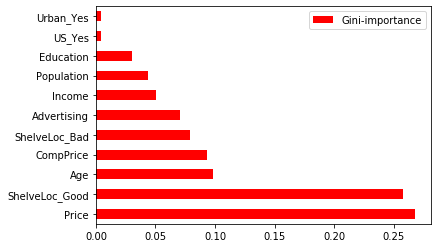

In [55]:
# Plot the impurity-based feature importances of the forest
feats = {} # a dict to hold feature_name: feature_importance
importances = clf.feature_importances_
for feature, importance in zip(X_col, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

### According to the gini-importance graph; Price creates the most significant improvement while splitting over it. After, very close gini-importance value to price is ShelveLoc_Good (second). Then there is a big drop. And Age, CompArative, Advertising, Income, ShelceLoc_Medium, Population, Education, US_Yes, Urban_Yes follow respectively.

# --------------------------------------------------------

# Question 2

In [65]:
#Importing modules.
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier

np.random.seed(0)

In [67]:
#Importing data set
#Drop NA value
df = pd.read_csv('Caravan_Dataset.csv')
df=df.dropna()

In [69]:
# Our target variable has been droped from df.
X = df.drop('Purchase',axis=1)
X_col=X.columns
# A target variable has been assigned to y.
y = df.Purchase
X

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,2,0,0,0,1,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# looking at y
y

0        No
1        No
2        No
3        No
4        No
       ... 
5817     No
5818     No
5819    Yes
5820     No
5821     No
Name: Purchase, Length: 5822, dtype: object

In [71]:
# Yes / no values changed to 1/0.
df.Purchase = df.Purchase.astype('category')
y = df.Purchase.cat.codes.values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

## a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.

In [72]:
# Split data into training and test set
# Split our first 1000 observations as trains.
# and remaining observations for testing.
X_train = X[:1000]
X_test = X[1000:]
y_train = y[:1000]
y_test = y[1000:]

In [74]:
# check and look to x_train
# first 1000 + (true)
X_train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33,1,2,4,8,2,5,0,3,9,...,0,0,0,0,0,0,0,0,0,0
996,1,1,2,4,1,0,2,0,7,6,...,0,0,0,0,1,0,0,2,0,0
997,33,1,3,3,8,1,5,0,3,7,...,0,0,0,0,1,0,0,0,0,0
998,3,1,2,4,1,0,4,2,4,5,...,0,0,0,0,1,0,0,0,0,0


In [76]:
# check and look to y_train
# first 1000 + (true)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

## b) Fit a random forests model to the training set with Purchase as the response and the other variables as predictors. (use ROC-AUC score to pick the best set of parameters).

In [77]:
# Grid search will be used for the best number of trees and number of features values.
# Because the response value is categorical, the Random Forest Classification should be fitted.
clf=RandomForestClassifier(random_state=0)

# number of trees in random forest
n_estimators = [100,200,300,400,500,600,700,800]

# number of features at every split
max_features = [1,2,3,4,5,6,7,8,9]

# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [78]:
# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)

# Fit the model
clf_grid.fit(X_train, y_train)

# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.4min finished


{'max_features': 4, 'n_estimators': 500}


## c) Use the random forests model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20 %.

In [79]:
# Best max_features: 4, best n_estimators: 500
# predicted porbabilities =>
clf=RandomForestClassifier(random_state=0,n_estimators=500,max_features=4,oob_score=True)
clf.fit(X_train,y_train)
y_pred_proba = clf.predict_proba(X_test)[::,1]
y_pred_proba

array([0.104, 0.06 , 0.076, ..., 0.016, 0.2  , 0.012])

In [81]:
# Predicted value with treshold = 0.5 (Default)
y_pred = clf.predict(X_test).astype('float')
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [82]:
# Confusion matrix (default treshold predictor)
confusion_matrix(y_test, y_pred)

array([[4497,   36],
       [ 282,    7]])

In [83]:
# Changing the threshold, set 0.2
threshold=0.2
y_pred=(y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [84]:
# Confusion matrix with treshold 0.2
confusion_matrix(y_test, y_pred)

array([[4315,  218],
       [ 253,   36]])

### There is a decrease in its forecast to be 0, but it still predicts very well. Although our prediction of being 1 with our new threshold value is getting stronger, it is still not enough.

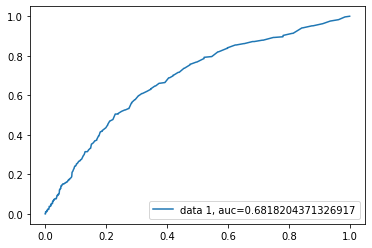

In [85]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### If the value of AUC is greater than 0.80, it says the model is working well. However, our value is 0.68 and it doesn't look very good.

## d) Form a confusion matrix.

In [86]:
# The confusion matrix with the new treshold value
confusion_matrix(y_test, y_pred)

array([[4315,  218],
       [ 253,   36]])

## e) What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [87]:
#Now we are gonna implement logistic regression on same data with 0.2 threshold and compare the results with previous one
clf=LogisticRegression(solver='liblinear')
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
penalties=['l1','l2']
# create grid
params = {
 'C': C_param_range,
 'penalty': penalties,
 }

clf_grid = GridSearchCV(estimator = clf, param_grid = params, 
                                cv = 5, verbose=2, scoring='roc_auc',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s


{'C': 0.1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.1s finished


In [88]:
# The probabilities
clf=LogisticRegression(C=0.1,penalty='l2',solver='liblinear')
clf.fit(X_train,y_train)
y_pred_proba = clf.predict_proba(X_test)[::,1]
y_pred_proba

array([0.00455065, 0.02189002, 0.05612874, ..., 0.04903385, 0.11654376,
       0.02090933])

In [89]:
# Predicted value with treshold = 0.5 (Default)
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [90]:
# Confusion matrix (default treshold predictor)
confusion_matrix(y_test, y_pred)

array([[4525,    8],
       [ 288,    1]])

In [91]:
# Changing the threshold, set 0.2
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype('float')
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [92]:
# Confusion matrix with treshold 0.2
confusion_matrix(y_test, y_pred)

array([[4358,  175],
       [ 240,   49]])

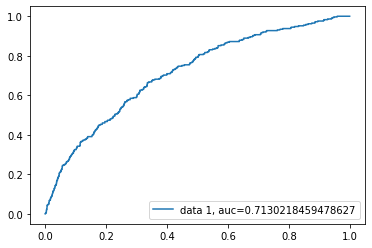

In [93]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### If the value of AUC is greater than 0.80 we can say that the model works well, 0.71 is better than our previous value.